# Assignment: Advanced Regression -- Part - I



## Model using ridge and Lasso method

### Best variable to focuse to purchase house.

####  'BsmtExposure_Gd', 'Condition1_Norm', 'OverallQual', 'Neighborhood_NridgHt',
###     'Functional_Typ', 'Neighborhood_Somerst', 'Exterior1st_BrkFace', 'Neighborhood_NoRidge',
 ###     'Neighborhood_Crawfor', 'BsmtFinType2_NA', 'GrLivArea', 'TotalBsmtSF')
 
 #### Model evalution using lasso regularization
MSE: 0.16540048492607168 

R-squre: 0.83609951978831
 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats


In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
### Inspect dataset
print(df.shape)
print("*************"*10)
print(df.info())

(1460, 81)
**********************************************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int6

In [6]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
## Check duplicates values
sum(df.duplicated(subset='Id'))

0

In [8]:
#### Check target variable
df['SalePrice'].describe(percentiles = [.1,.2,.3,.4,.5,.6,.7,.8,.9,.92,.95,.99])

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
10%      106475.000000
20%      124000.000000
30%      135500.000000
40%      147000.000000
50%      163000.000000
60%      179280.000000
70%      198620.000000
80%      230000.000000
90%      278000.000000
92%      295914.960000
95%      326100.000000
99%      442567.010000
max      755000.000000
Name: SalePrice, dtype: float64

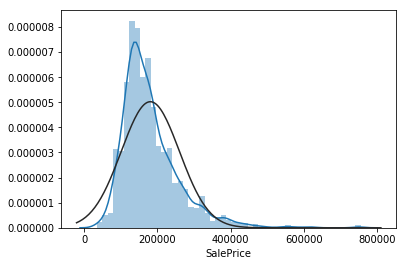

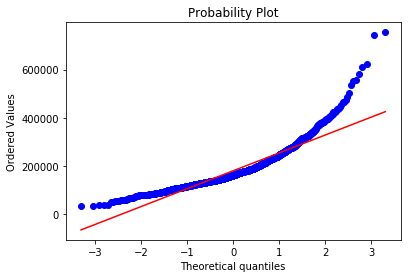

In [9]:
sns.distplot(df['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)

In [10]:
### Distribution of target variable
#sns.distplot(df['SalePrice'])

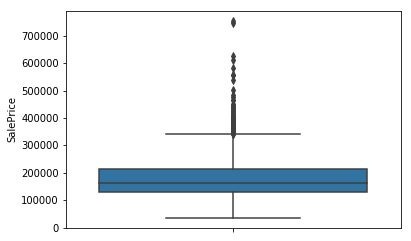

In [11]:
### Check outlier on Target variables
sns.boxplot(y= df['SalePrice'])

# Missing data

In [12]:
## Lets check missing values in dataset
#load_df.loc[:,list(round(100*(load_df.isnull().sum()/len(load_df.index)),2) > 65)].columns
df.loc[:,list(round(100*(df.isnull().sum(axis=0)/len(df.index)),2)>75)].columns


Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [13]:
round(100*(df.isnull().sum(axis=0)/len(df.index)),2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
                 ...  
BedroomAbvGr      0.00
KitchenAbvGr      0.00
KitchenQual       0.00
TotRmsAbvGrd      0.00
Functional        0.00
Fireplaces        0.00
FireplaceQu      47.26
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageCars        0.00
GarageArea        0.00
GarageQual 

In [14]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [15]:
## Drop columns which has more than 75 % missing values
df = df.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)
df.shape

(1460, 77)

In [16]:
#### Investigate missing values
### FireplaceQu
df['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [17]:
df['FireplaceQu'] = df['FireplaceQu'].fillna('NA')
df[['FireplaceQu','Fireplaces']].head(10)

,FireplaceQu,Fireplaces
0,NA,0
1,TA,1
2,TA,1
3,Gd,1
4,TA,1
5,NA,0
6,Gd,1
7,TA,2
8,TA,2
9,TA,2


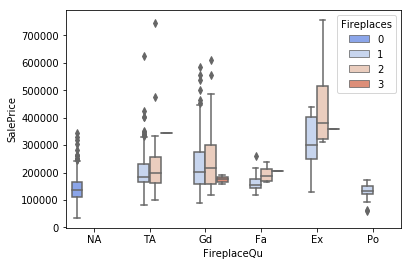

In [18]:
#sns.distplot(y='SalePrice',x='FireplaceQu', )
sns.boxplot(x="FireplaceQu",y="SalePrice",hue="Fireplaces",data=df, palette="coolwarm")

In [19]:
### Lets make drived column "Firequality" using "FireplaceQu" and Fireplaces
#dict1 = {'NA':0,'Po':1,}

In [20]:
df[['LotFrontage']].head(10)

,LotFrontage
0,65.0
1,80.0
2,68.0
3,60.0
4,84.0
5,85.0
6,75.0
7,NaN
8,51.0
9,50.0


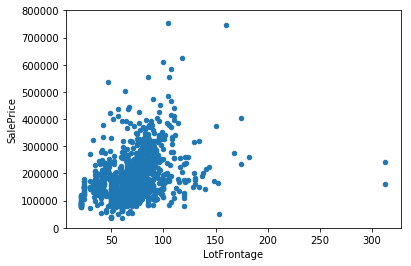

In [21]:
df.plot.scatter(x='LotFrontage', y='SalePrice', ylim=(0,800000));

In [22]:
df['LotFrontage'] = df['LotFrontage'].fillna(df.LotFrontage.mean())

In [23]:
#df[['LotFrontage']].head(10)

In [24]:
df[['MasVnrType','MasVnrArea']].head()

,MasVnrType,MasVnrArea
0,BrkFace,196.0
1,None,0.0
2,BrkFace,162.0
3,None,0.0
4,BrkFace,350.0


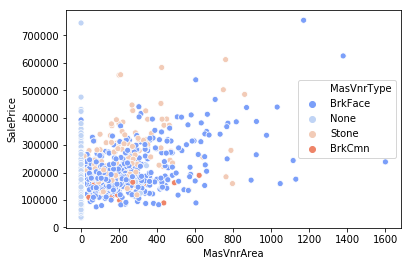

In [25]:
sns.scatterplot(x="MasVnrArea",y="SalePrice",hue="MasVnrType",data=df, palette="coolwarm")
#

In [26]:
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['MasVnrArea'] = df['MasVnrArea'].fillna(0.0)
df['MasVnrType'].value_counts()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [27]:
#GarageType        5.55
#GarageYrBlt       5.55
#GarageFinish      5.55
#GarageCars        0.00
#GarageArea        0.00
#GarageQual        5.55
#GarageCond        5.55

In [28]:
gg = ['GarageType','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond']
df[gg] = df[gg].fillna('NA')
#GarageYrBlt
df[gg].head()
#.isnull().sum(axis=0)

,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
0,Attchd,RFn,2,548,TA,TA
1,Attchd,RFn,2,460,TA,TA
2,Attchd,RFn,2,608,TA,TA
3,Detchd,Unf,3,642,TA,TA
4,Attchd,RFn,3,836,TA,TA


In [29]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)

In [30]:
bb = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
df[bb]= df[bb].fillna('NA')
df['BsmtQual'].value_counts()
#.value_counts()

TA    649
Gd    618
Ex    121
NA     37
Fa     35
Name: BsmtQual, dtype: int64

In [31]:
df['Electrical'].value_counts()
#df['Electrical'].isnull().sum()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [32]:
df['Electrical'] = df['Electrical'].fillna('SBrkr')

In [33]:
#round(100*(df.isnull().sum(axis=0)/len(df.index)),2)
df.loc[:,list(round(100*(df.isnull().sum(axis=0)/len(df.index)),2)>.01)].columns

Index([], dtype='object')

In [176]:
df.isnull().values.any()

False

In [177]:
df_new = df.copy()

### So Far missing value handeled.
# Lets work on check insight univariate and multi-variable 

In [178]:
### check numaical and categorial variables
cat_var = df_new.select_dtypes(include='object')
num_var = df_new.select_dtypes(include=['int64','float64'])
#num_var.head()
#cat_var.head()

In [179]:
df_new.shape

(1460, 77)

In [180]:
### Drive columns orverall house quality""
df_new[['OverallQual','OverallCond']]
df_new['Overall_h_Q'] = (df_new.OverallCond + df_new.OverallQual)/2

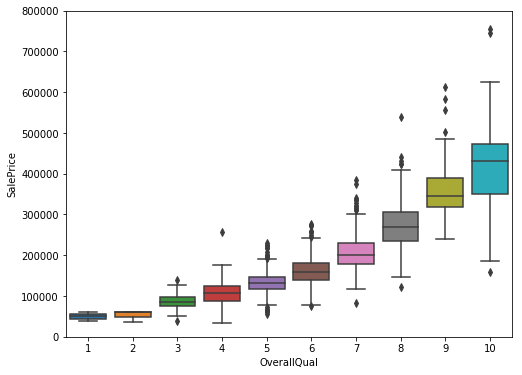

In [181]:
#sns.pairplot(x='Overall_h_Q', y='SalePrice', ylim=(0,800000));
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=df_new)
fig.axis(ymin=0, ymax=800000);

In [182]:
### how much old house is ?
df_new['old_house_year'] = 2019 - df_new.YearBuilt

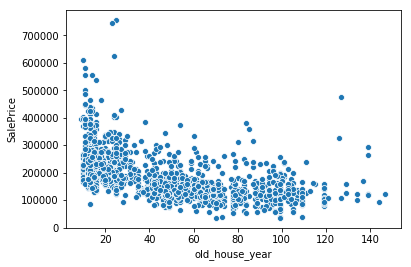

In [183]:
 sns.scatterplot(x='old_house_year', y='SalePrice', data = df_new);

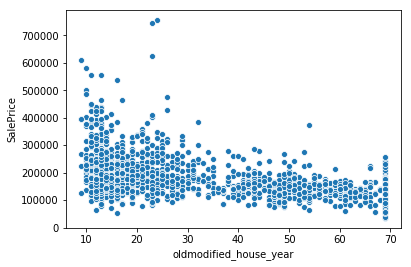

In [184]:
df_new['oldmodified_house_year'] = 2019 - df_new.YearRemodAdd
sns.scatterplot(x='oldmodified_house_year', y='SalePrice', data = df_new);


## Outliers 

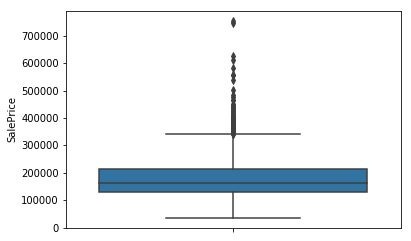

In [185]:

sns.boxplot(y=df_new['SalePrice'])

In [186]:
#percentiles = df_new['SalePrice'].quantile([0.01,0.95]).values
#df_new['SalePrice'][df_new['SalePrice'] <= percentiles[0]] = percentiles[0]
#df_new['SalePrice'][df_new['SalePrice'] >= percentiles[1]] = percentiles[1]
#df_new.shape

In [187]:
mydf = df_new.copy()

In [190]:
mydf.SalePrice.describe(percentiles=[.02,.03,.04,.05,.1,.2,.3,.4,.5,.9,.95,.97,.98,.99])

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
2%        79000.000000
3%        82000.000000
4%        85000.000000
5%        88000.000000
10%      106475.000000
20%      124000.000000
30%      135500.000000
40%      147000.000000
50%      163000.000000
90%      278000.000000
95%      326100.000000
97%      374230.000000
98%      394931.060000
99%      442567.010000
max      755000.000000
Name: SalePrice, dtype: float64

In [217]:
 Q1 = mydf.SalePrice.quantile(.5)
Q3 = mydf.SalePrice.quantile(0.95)
IQR = Q3 - Q1
print(IQR)

162348.59999999992


In [218]:
#Q1 = mydf.quantile(0.1)
#Q3 = mydf.quantile(0.99)
#IQR = Q3 - Q1
#print(IQR)

In [219]:
#print(mydf < (Q1 - 1.5 * IQR)) |(mydf > (Q3 + 1.5 * IQR))

In [304]:
#mydf = mydf[~((mydf[['SalePrice']] < (Q1 - 1.5 * IQR))|(mydf[['SalePrice']] > (Q3 + 1.5 * IQR))).any(axis=1)]
#mydf[['SalePrice']]

In [277]:

Q1 = mydf.SalePrice.quantile(0.5)
Q3 = mydf.SalePrice.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

boston_df_out = mydf[~((mydf[['SalePrice']] < (Q1 - 1.5 * IQR)) |(mydf[['SalePrice']] > (Q3 + 1.5 * IQR))).any(axis=1)]

50595.0


In [278]:
boston_df_out.shape

(1264, 80)

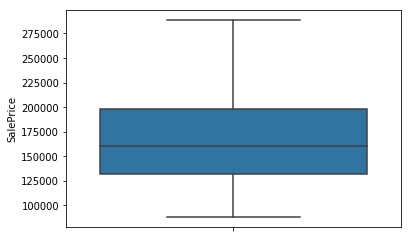

In [279]:
sns.boxplot(y=boston_df_out['SalePrice'])

In [280]:
#ns.boxplot(y=df_new['SalePrice'])

In [281]:
df_new = boston_df_out.copy()

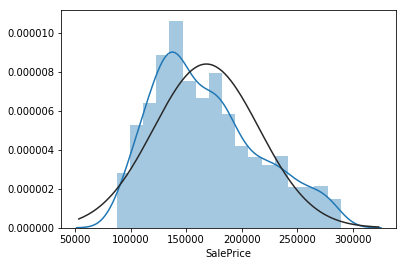

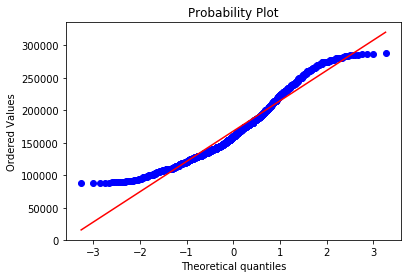

In [282]:
sns.distplot(df_new['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_new['SalePrice'], plot=plt)

In [283]:
#applying log transformation
df_new['SalePrice'] = np.log(df_new['SalePrice'])

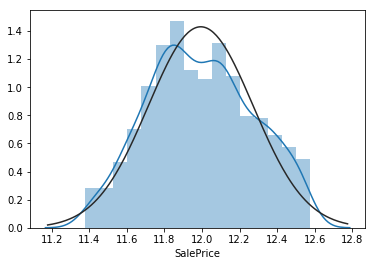

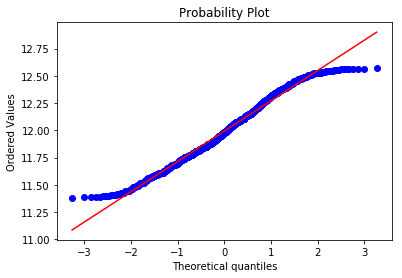

In [284]:
sns.distplot(df_new['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_new['SalePrice'], plot=plt)

In [286]:
fig = plt.figure()
#sns.scatterplot( y='SalePrice', data = df_new);

<Figure size 432x288 with 0 Axes>

In [287]:
clm_lst = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual','OverallCond','MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF','EnclosedPorch', 
        '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold']

In [288]:
%matplotlib inline
#plt.figure(figsize=(30, 30))
#for i in range(1,len(clm_lst)):
#    plt.subplot(10,4,i)
#    sns.boxplot(y = clm_lst[i], data = df_new)
#plt.show()

In [289]:
#df_new = df_new1.copy()

In [290]:
#df_new[var]

In [291]:
var = ['LotFrontage']
percentiles = df_new['LotFrontage'].quantile([0.04,0.96]).values
df_new['LotFrontage'][df_new['LotFrontage'] <= percentiles[0]] = percentiles[0]
df_new['LotFrontage'][df_new['LotFrontage'] >= percentiles[1]] = percentiles[1]
df_new.shape

(1264, 80)

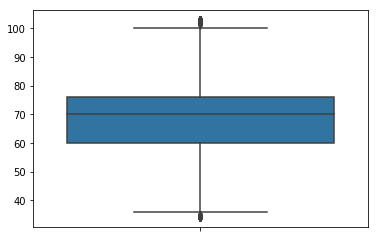

In [292]:
sns.boxplot(y = var, data = df_new)

In [293]:
#df_new['LotFrontage'][df_new['LotFrontage'] <= percentiles[0]] 
#percentiles

In [294]:
var = ['LotArea']
percentiles = df_new['LotArea'].quantile([0.04,0.95]).values
df_new['LotArea'][df_new['LotArea'] <= percentiles[0]] = percentiles[0]
df_new['LotArea'][df_new['LotArea'] >= percentiles[1]] = percentiles[1]
df_new.shape

(1264, 80)

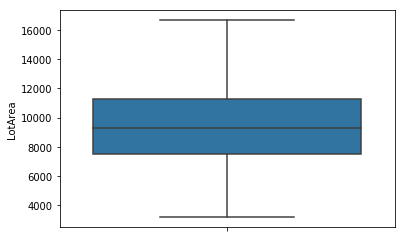

In [295]:
sns.boxplot(y = 'LotArea', data = df_new)

In [296]:
import numpy as np
import pandas as pd
outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [297]:
outlier_datapoints = detect_outlier(df_new.BsmtFinSF2)
print(outlier_datapoints)

[668, 712, 869, 670, 1080, 768, 712, 580, 690, 692, 1063, 620, 544, 713, 1120, 1127, 645, 551, 606, 612, 723, 551, 1057, 630, 764, 539, 1085, 823, 634, 841, 1061, 682, 557, 791, 547, 600, 906, 608, 661, 972, 546, 872, 627, 1029]


In [298]:
var = ['BsmtUnfSF']
percentiles = df_new['BsmtUnfSF'].quantile([0.04,0.95]).values
df_new['BsmtUnfSF'][df_new['BsmtUnfSF'] <= percentiles[0]] = percentiles[0]
df_new['BsmtUnfSF'][df_new['BsmtUnfSF'] >= percentiles[1]] = percentiles[1]
df_new.shape

(1264, 80)

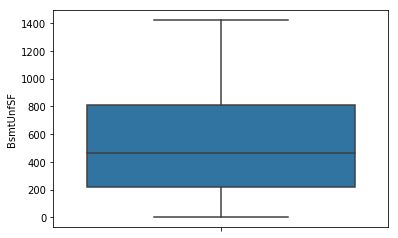

In [299]:
sns.boxplot(y = 'BsmtUnfSF', data = df_new)

In [300]:
#df_new[['BsmtFinSF2','BsmtFinType2']]

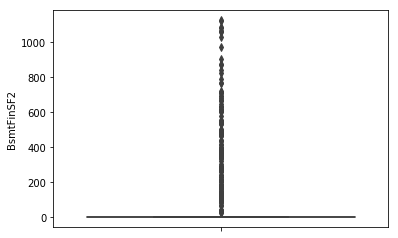

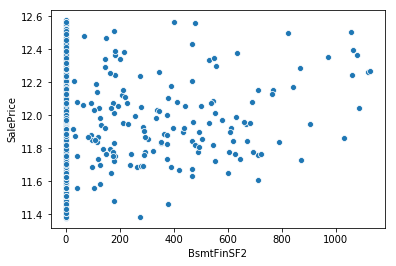

In [303]:
sns.boxplot(y = 'BsmtFinSF2', data = df_new)
fig = plt.figure()
sns.scatterplot(x='BsmtFinSF2', y='SalePrice', data = df_new);

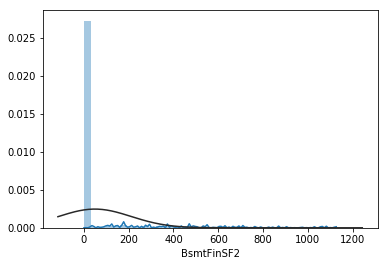

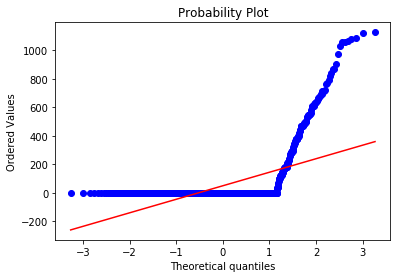

In [302]:
sns.distplot(df_new['BsmtFinSF2'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_new['BsmtFinSF2'], plot=plt)

In [305]:
var = 'TotalBsmtSF'
percentiles = df_new[var].quantile([0.0,0.97]).values
df_new[var][df_new[var] <= percentiles[0]] = percentiles[0]
df_new[var][df_new[var] >= percentiles[1]] = percentiles[1]
df_new.shape

(1264, 80)

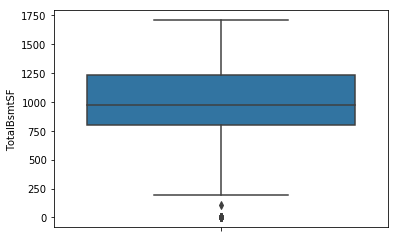

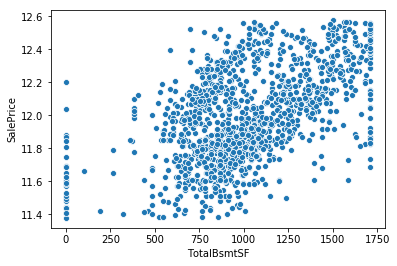

In [307]:
#'TotalBsmtSF'
sns.boxplot(y = 'TotalBsmtSF', data = df_new)
fig = plt.figure()
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data = df_new);

In [308]:
var = '1stFlrSF'
percentiles = df_new[var].quantile([0.0,0.97]).values
df_new[var][df_new[var] <= percentiles[0]] = percentiles[0]
df_new[var][df_new[var] >= percentiles[1]] = percentiles[1]
df_new.shape

(1264, 80)

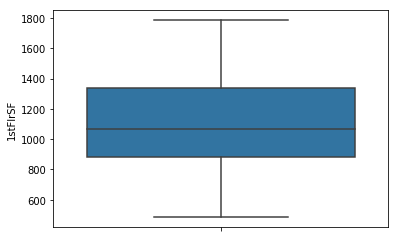

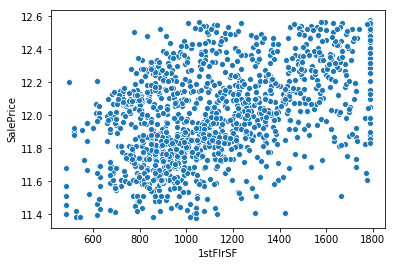

In [309]:
var = '1stFlrSF'
#'TotalBsmtSF'
sns.boxplot(y = var, data = df_new)
fig = plt.figure()
sns.scatterplot(x=var, y='SalePrice', data = df_new);

In [310]:
#var = '2ndFlrSF'
#percentiles = df_new[var].quantile([0.0,0.97]).values
#df_new[var][df_new[var] <= percentiles[0]] = percentiles[0]
#df_new[var][df_new[var] >= percentiles[1]] = percentiles[1]
#df_new.shape

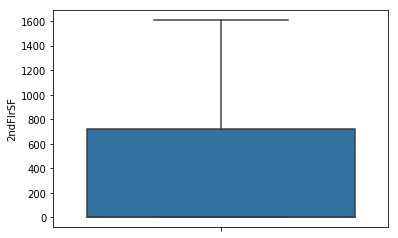

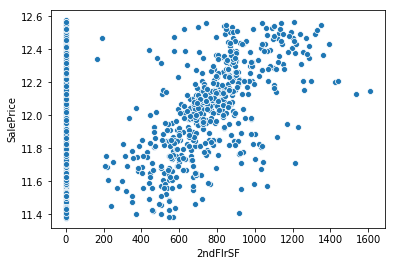

In [311]:
var = '2ndFlrSF'
#'TotalBsmtSF'
sns.boxplot(y = var, data = df_new)
fig = plt.figure()
sns.scatterplot(x=var, y='SalePrice', data = df_new);

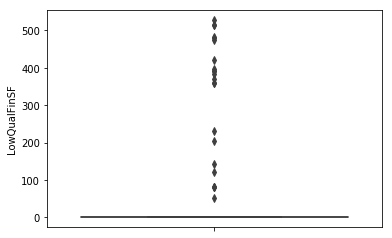

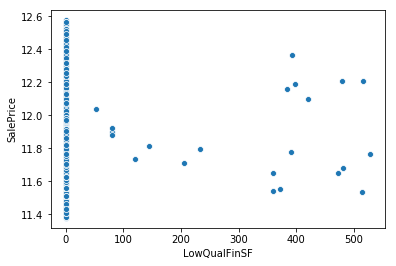

In [312]:
#LowQualFinSF
var = 'LowQualFinSF'
#'TotalBsmtSF'
sns.boxplot(y = var, data = df_new)
fig = plt.figure()
sns.scatterplot(x=var, y='SalePrice', data = df_new);

In [313]:
var = 'GrLivArea'
percentiles = df_new[var].quantile([0.0,0.97]).values
df_new[var][df_new[var] <= percentiles[0]] = percentiles[0]
df_new[var][df_new[var] >= percentiles[1]] = percentiles[1]
df_new.shape

(1264, 80)

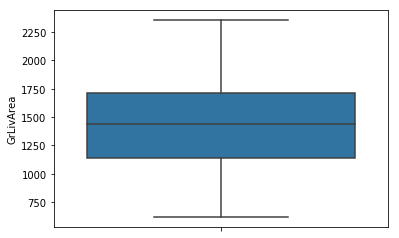

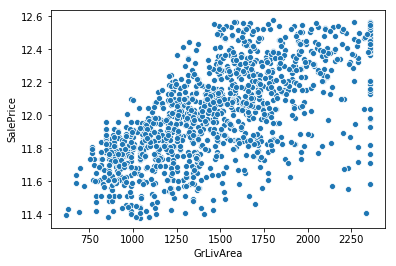

In [314]:
### GrLivArea
#LowQualFinSF
var = 'GrLivArea'
#'TotalBsmtSF'
sns.boxplot(y = var, data = df_new)
fig = plt.figure()
sns.scatterplot(x=var, y='SalePrice', data = df_new);

In [319]:
var = 'BedroomAbvGr'
percentiles = df_new[var].quantile([0.01,0.97]).values
df_new[var][df_new[var] <= percentiles[0]] = percentiles[0]
df_new[var][df_new[var] >= percentiles[1]] = percentiles[1]
df_new.shape

(1264, 80)

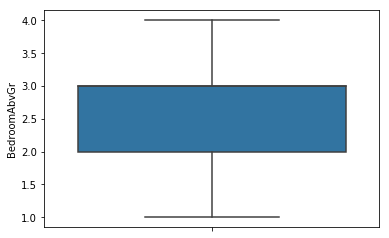

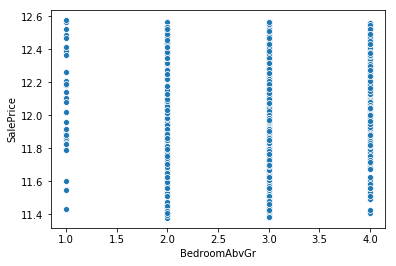

In [320]:
#BedroomAbvGr

var = 'BedroomAbvGr'
'TotalBsmtSF'
sns.boxplot(y = var, data = df_new)
fig = plt.figure()
sns.scatterplot(x=var, y='SalePrice', data = df_new);

In [321]:
df_new['GarageYrBlt_old'] = 2019 - df_new.GarageYrBlt
df_new['YrSold_old'] = 2019 - df_new.YrSold


In [322]:
df_new = df_new.drop(['Id','Overall_h_Q','YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'], axis=1)

In [323]:
cat_var = df_new.select_dtypes(include='object')
num_var = df_new.select_dtypes(include=['int64','float64'])

In [325]:
df_new.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'Po

In [ ]:
#df.plot.scatter(x='old_house_year', y='SalePrice', ylim=(0,800000));

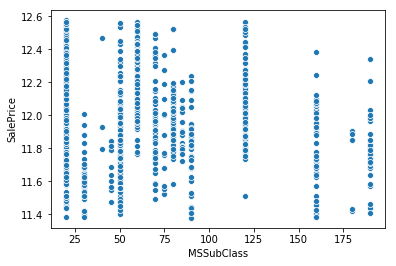

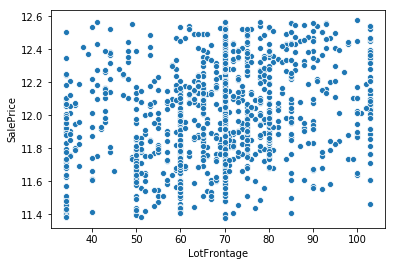

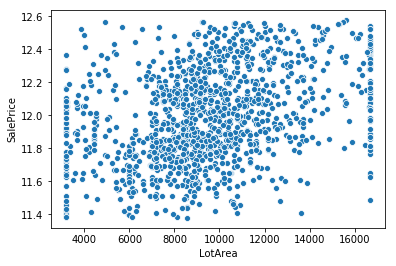

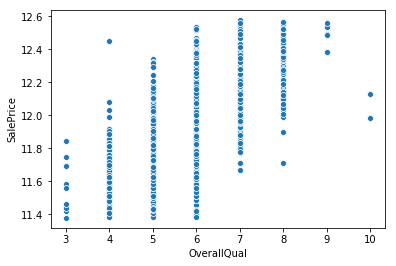

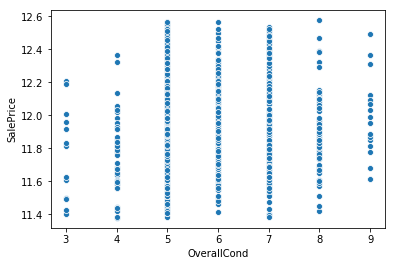

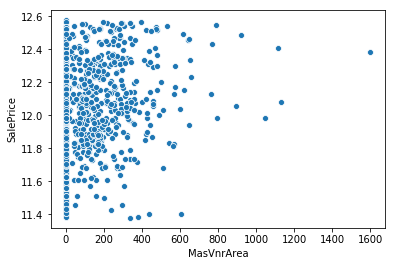

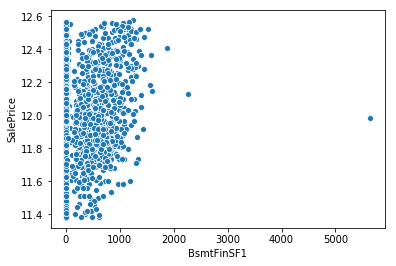

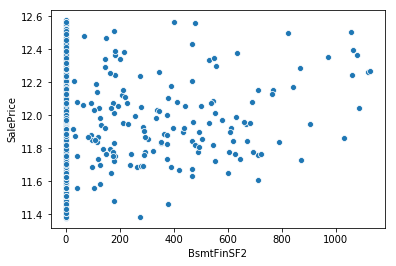

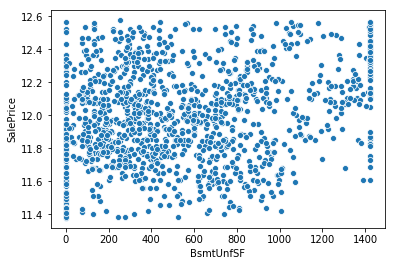

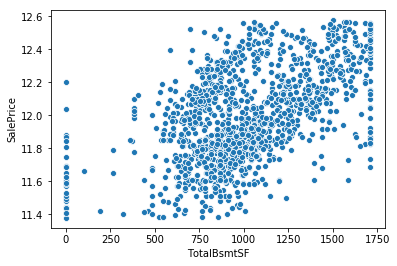

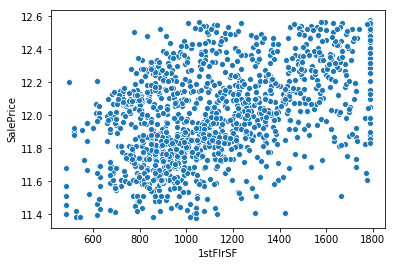

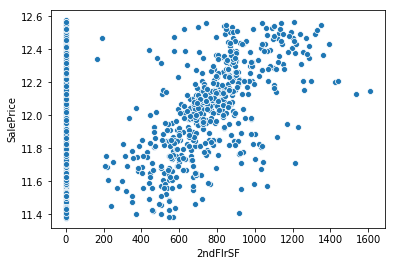

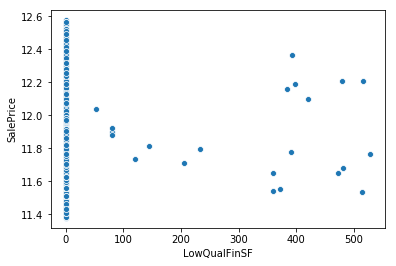

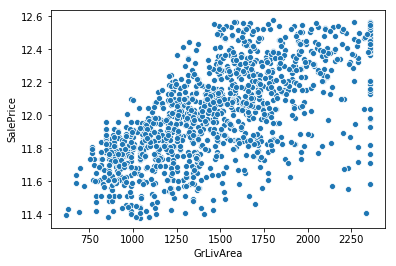

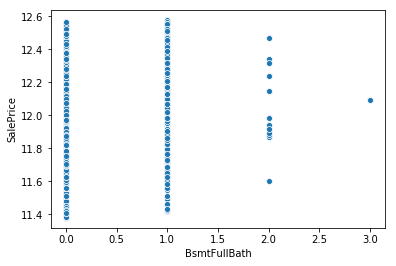

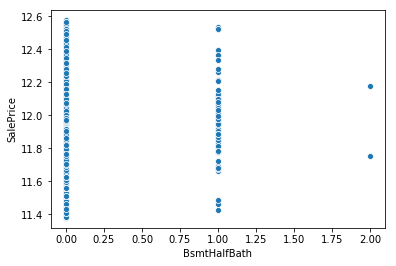

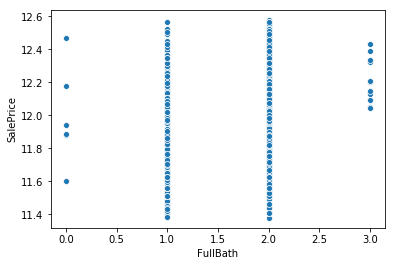

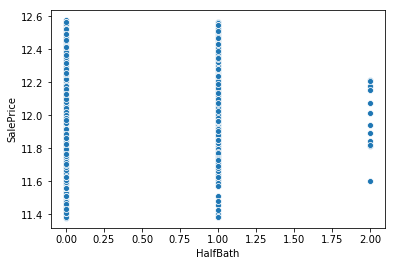

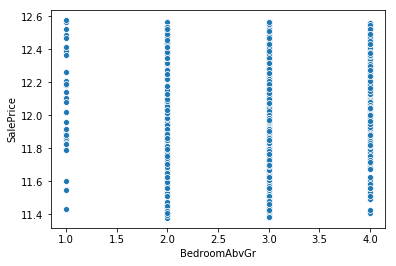

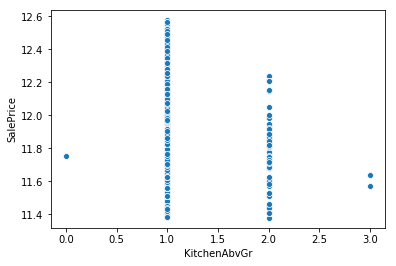

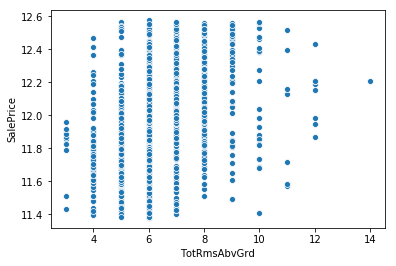

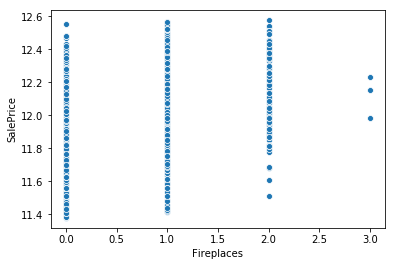

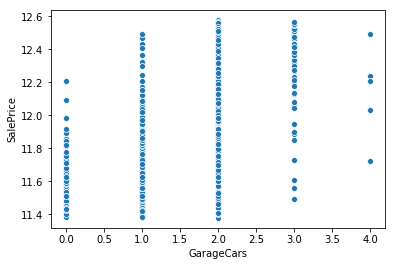

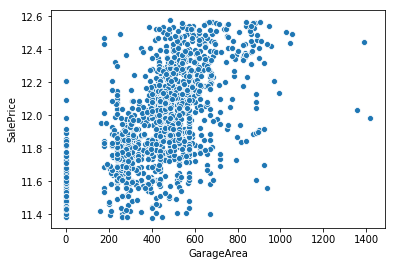

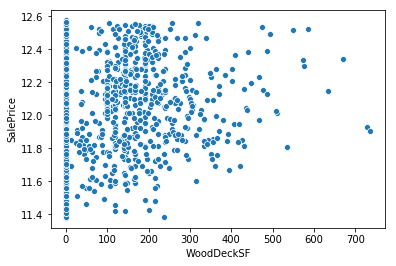

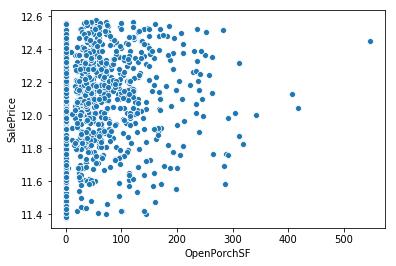

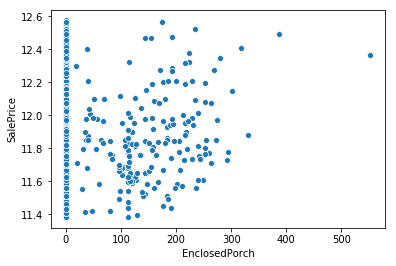

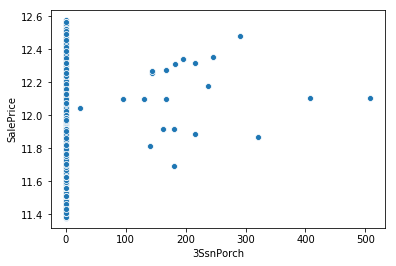

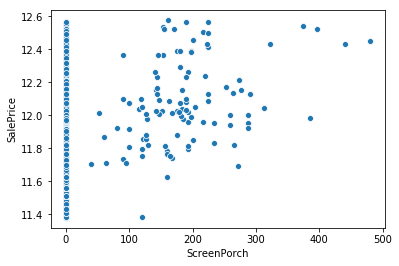

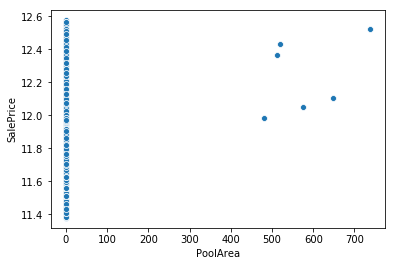

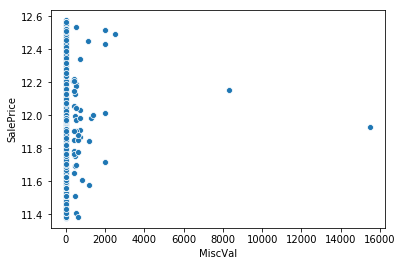

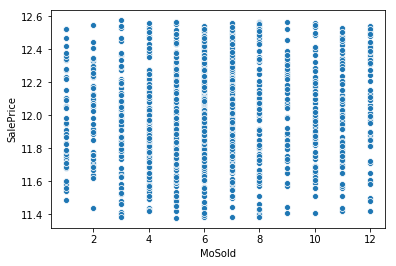

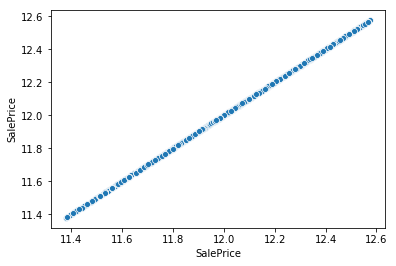

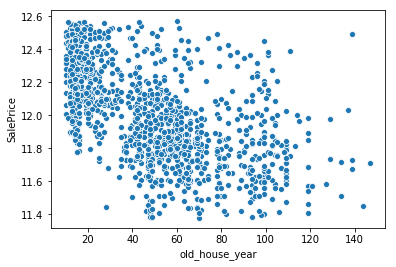

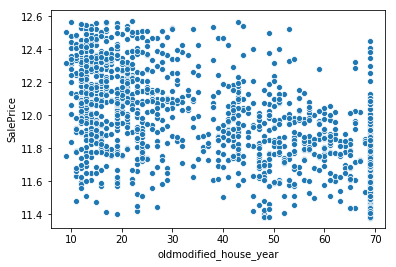

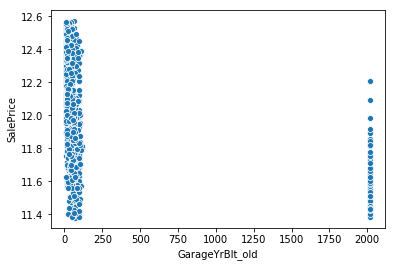

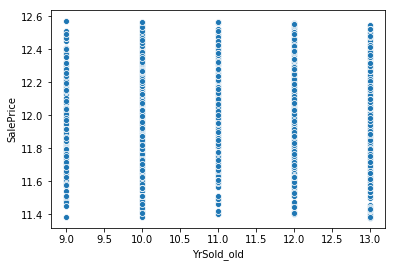

<Figure size 432x288 with 0 Axes>

In [329]:
for i in num_var.columns:
    sns.scatterplot(x=i, y='SalePrice', data = df_new)
    fig = plt.figure()
    

In [80]:
df_new.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,old_house_year,oldmodified_house_year,GarageYrBlt_old,YrSold_old
0,60,RL,65.000000,8450.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,2,WD,Normal,208500.0,16,16,16.0,11
1,20,RL,80.000000,9600.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,5,WD,Normal,181500.0,43,43,43.0,12
2,60,RL,68.000000,11250.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,9,WD,Normal,223500.0,18,17,18.0,11
3,70,RL,60.000000,9550.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,2,WD,Abnorml,140000.0,104,49,21.0,13
4,60,RL,84.000000,14260.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,12,WD,Normal,250000.0,19,19,19.0,11
5,50,RL,85.000000,14115.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,700,10,WD,Normal,143000.0,26,24,26.0,10
6,20,RL,75.000000,10084.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,8,WD,Normal,307000.0,15,14,15.0,12
7,60,RL,70.049958,10382.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,350,11,WD,Normal,200000.0,46,46,46.0,10
8,50,RM,51.000000,6120.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,4,WD,Abnorml,129900.0,88,69,88.0,11
9,190,RL,50.000000,7420.0,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,1,WD,Normal,118000.0,80,69,80.0,11


In [81]:

df_new.shape

(1460, 76)

In [82]:
cor = num_var.corr()
cor

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,old_house_year,oldmodified_house_year,GarageYrBlt_old,YrSold_old
MSSubClass,1.000000,-0.388875,-0.380222,0.032628,-0.059316,0.023573,-0.069836,-0.065649,-0.138069,-0.252168,...,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.085217,-0.027850,-0.040581,0.080997,0.021407
LotFrontage,-0.388875,1.000000,0.573438,0.244813,-0.060537,0.208941,0.155655,0.052338,0.138939,0.329691,...,0.074657,0.055395,0.073996,0.004552,0.016390,0.376031,-0.144407,-0.077671,-0.119367,-0.007062
LotArea,-0.380222,0.573438,1.000000,0.223016,-0.019923,0.166504,0.222435,0.096317,0.076121,0.353433,...,0.069044,0.106868,0.101419,0.056266,0.002873,0.436584,-0.070882,-0.054801,-0.147040,0.035466
OverallQual,0.032628,0.244813,0.223016,1.000000,-0.091932,0.407252,0.239666,-0.059119,0.294007,0.537032,...,0.030371,0.064886,0.065166,-0.031406,0.070815,0.816157,-0.572323,-0.550684,-0.288998,0.027347
OverallCond,-0.059316,-0.060537,-0.019923,-0.091932,1.000000,-0.125694,-0.046231,0.040229,-0.132878,-0.177755,...,0.025504,0.054811,-0.001985,0.068777,-0.003511,-0.075943,0.375983,-0.073741,0.006515,-0.043950
MasVnrArea,0.023573,0.208941,0.166504,0.407252,-0.125694,1.000000,0.261256,-0.071330,0.093351,0.337466,...,0.019144,0.062248,0.011928,-0.029512,-0.006723,0.434615,-0.311600,-0.176529,-0.132696,0.008317
BsmtFinSF1,-0.069836,0.155655,0.222435,0.239666,-0.046231,0.261256,1.000000,-0.050117,-0.506228,0.457428,...,0.026451,0.062021,0.140491,0.003571,-0.015727,0.365970,-0.249503,-0.128451,-0.115843,-0.014359
BsmtFinSF2,-0.065649,0.052338,0.096317,-0.059119,0.040229,-0.071330,-0.050117,1.000000,-0.216328,0.106584,...,-0.029993,0.088871,0.041709,0.004940,-0.015211,-0.007079,0.049107,0.067759,-0.035070,-0.031706
BsmtUnfSF,-0.138069,0.138939,0.076121,0.294007,-0.132878,0.093351,-0.506228,-0.216328,1.000000,0.415376,...,0.025135,-0.014343,-0.035628,-0.023141,0.037633,0.207684,-0.133691,-0.172746,-0.042522,0.043713
TotalBsmtSF,-0.252168,0.329691,0.353433,0.537032,-0.177755,0.337466,0.457428,0.106584,0.415376,1.000000,...,0.044696,0.092852,0.043329,-0.018047,0.030478,0.639974,-0.409484,-0.303055,-0.188408,0.020066


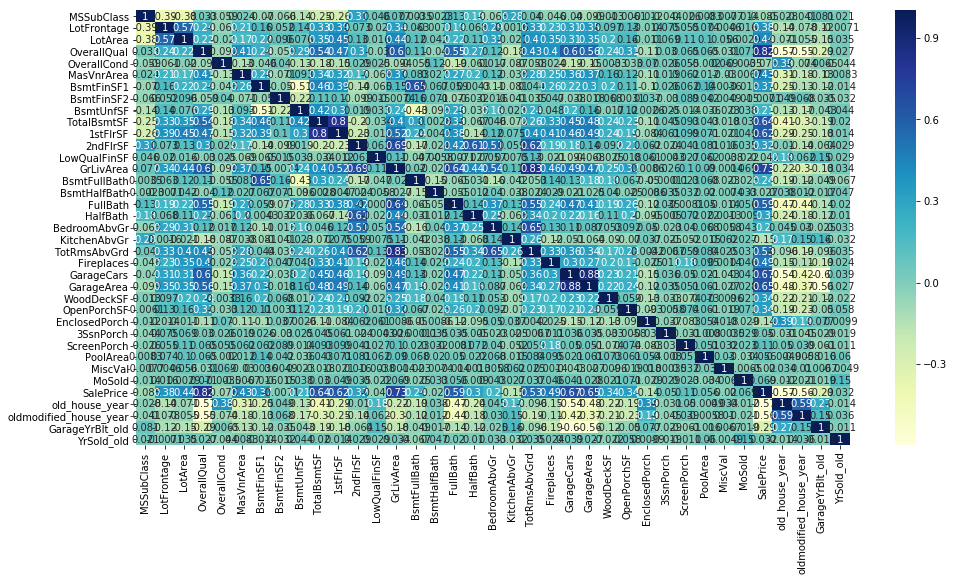

In [83]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

## Analyise Catogerial variables

In [357]:
df_new3 = df_new.copy()

In [358]:
cat_var.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NA,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [359]:
cat_var.columns.values

array(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype=object)

In [360]:
df_new3['MSZoning'].value_counts()

RL         1006
RM          183
FV           59
RH           13
C (all)       3
Name: MSZoning, dtype: int64

In [361]:
df_new3['MSZoning'] = df_new3['MSZoning'].apply(lambda x : x.split(' ')).map(lambda x : x[0])
df_new3['MSZoning'].value_counts()

RL    1006
RM     183
FV      59
RH      13
C        3
Name: MSZoning, dtype: int64

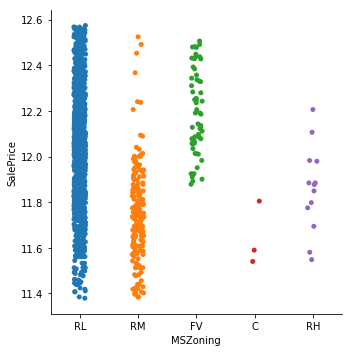

In [362]:
var = 'MSZoning'
sns.catplot(x=var, y='SalePrice', data = df_new3)

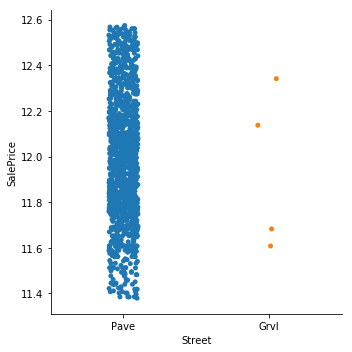

In [363]:
var = 'Street'
sns.catplot(x=var, y='SalePrice', data = df_new3)

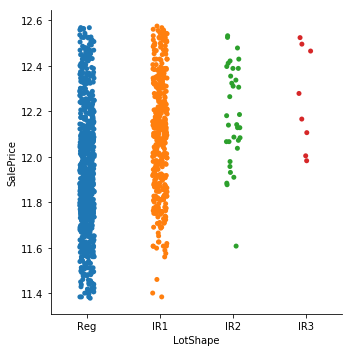

In [364]:
var = 'LotShape'
sns.catplot(x=var, y='SalePrice', data = df_new3)

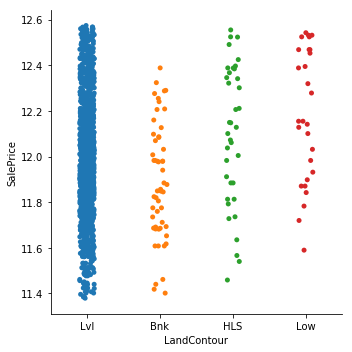

In [365]:
var = 'LandContour'
sns.catplot(x=var, y='SalePrice', data = df_new3)

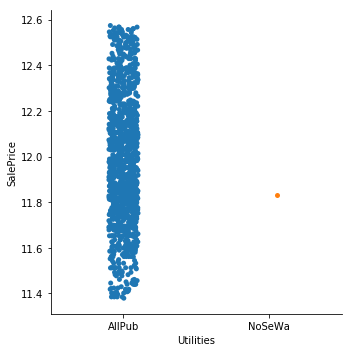

In [366]:
var = 'Utilities'
sns.catplot(x=var, y='SalePrice', data = df_new3)

In [367]:
### On the base of above insight, we can drop this variables
df_new3 = df_new3.drop('Utilities', axis = 1)

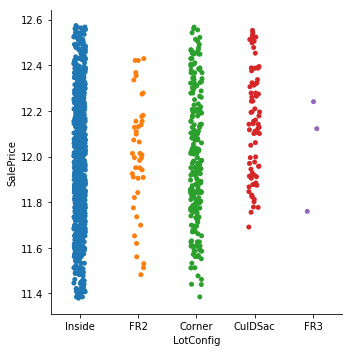

In [368]:
var = 'LotConfig'
sns.catplot(x=var, y='SalePrice', data = df_new3)

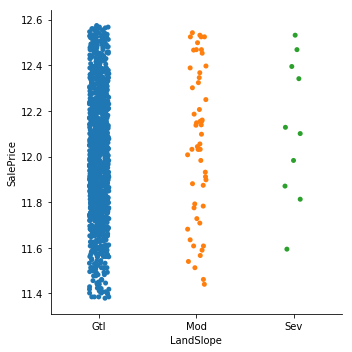

In [369]:
var = 'LandSlope'
sns.catplot(x=var, y='SalePrice', data = df_new3)

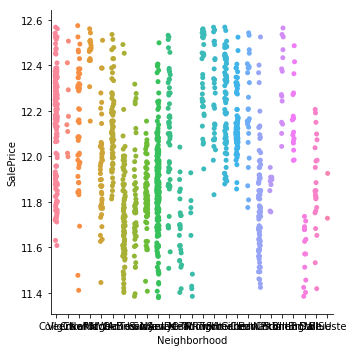

In [370]:
var = 'Neighborhood'
sns.catplot(x=var, y='SalePrice', data = df_new3)

In [371]:
df_new3[var].value_counts()

NAmes      224
CollgCr    144
OldTown     97
Edwards     83
Gilbert     77
Somerst     75
Sawyer      72
NWAmes      71
SawyerW     54
Mitchel     48
BrkSide     47
Crawfor     45
NridgHt     35
Timber      29
ClearCr     26
SWISU       24
IDOTRR      24
Blmngtn     17
NoRidge     16
StoneBr     14
BrDale      14
NPkVill      9
MeadowV      9
Veenker      8
Blueste      2
Name: Neighborhood, dtype: int64

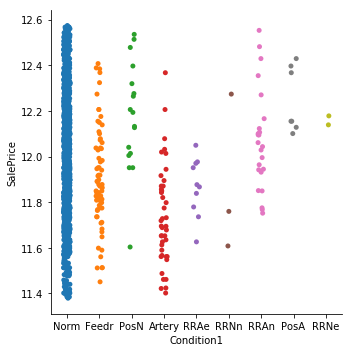

In [372]:
var = 'Condition1'
sns.catplot(x=var, y='SalePrice', data = df_new3)

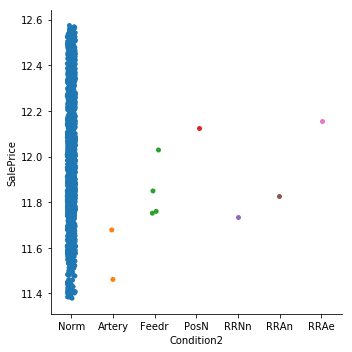

In [373]:
var = 'Condition2'
sns.catplot(x=var, y='SalePrice', data = df_new3)

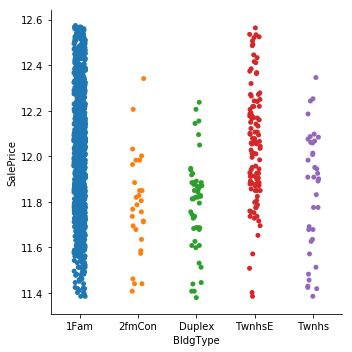

In [374]:
var = 'BldgType'
sns.catplot(x=var, y='SalePrice', data = df_new3)

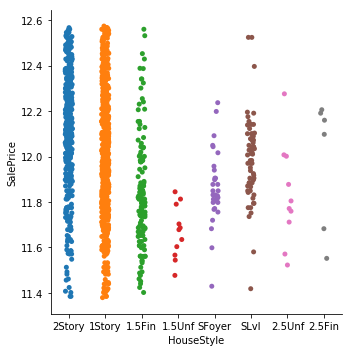

In [375]:
var = 'HouseStyle'
sns.catplot(x=var, y='SalePrice', data = df_new3)

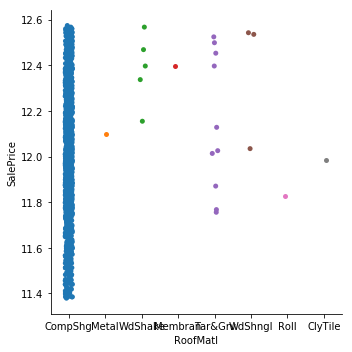

In [376]:
var = 'RoofMatl'
sns.catplot(x=var, y='SalePrice', data = df_new3)

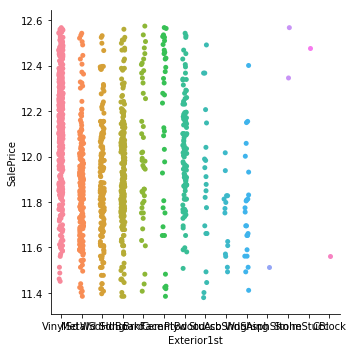

In [377]:
var = 'Exterior1st'
sns.catplot(x=var, y='SalePrice', data = df_new3)

In [378]:
df_new3 = df_new3.replace({'MSSubClass': {  20: 'dwel_type_20', 
                                            30: 'dwel_type_30', 
                                            40: 'dwel_type_40', 
                                            45: 'dwel_type_45',
                                            50: 'dwel_type_50', 
                                            60: 'dwel_type_60',
                                            70: 'dwel_type_70',
                                            75: 'dwel_type_75',
                                            80: 'dwel_type_80',
                                            85: 'dwel_type_85',
                                            90: 'dwel_type_90',
                                           120: 'dwel_type_120',
                                           150: 'dwel_type_150',
                                           160: 'dwel_type_160',
                                           180: 'dwel_type_180',
                                           190: 'dwel_type_190'}})


In [379]:
df_new3 = df_new3.replace({'Utilities': {'AllPub': 1, 'NoSeWa': 0, 'NoSewr': 0, 'ELO': 0},
                             'Street': {'Pave': 1, 'Grvl': 0 },
                             'FireplaceQu': {'Ex': 5, 
                                            'Gd': 4, 
                                            'TA': 3, 
                                            'Fa': 2,
                                            'Po': 1,
                                            'NoFireplace': 0 
                                            },
                             'Fence': {'GdPrv': 2, 
                                       'GdWo': 2, 
                                       'MnPrv': 1, 
                                       'MnWw': 1,
                                       'NoFence': 0},
                             'ExterQual': {'Ex': 5,  
											'Gd': 4, 
                                            'TA': 3, 
                                            'Fa': 2,
                                            'Po': 1
                                            },
                             'ExterCond': {'Ex': 5, 
                                            'Gd': 4, 
                                            'TA': 3, 
                                            'Fa': 2,
                                            'Po': 1
                                            },
                             'BsmtQual': {'Ex': 5, 
                                            'Gd': 4, 
                                            'TA': 3, 
                                            'Fa': 2,
                                            'Po': 1,
                                            'NoBsmt': 0},
											'BsmtExposure': {'Gd': 3, 
                                            'Av': 2, 
                                            'Mn': 1,
                                            'No': 0,
                                            'NoBsmt': 0},
                             'BsmtCond': {'Ex': 5, 
                                            'Gd': 4, 
                                            'TA': 3, 
                                            'Fa': 2,
                                            'Po': 1,
                                            'NoBsmt': 0},
                             'GarageQual': {'Ex': 5, 
                                            'Gd': 4, 
											'TA': 3, 
                                            'Fa': 2,
                                            'Po': 1,
                                            'NoGarage': 0},
                             'GarageCond': {'Ex': 5, 
                                            'Gd': 4, 
                                            'TA': 3, 
                                            'Fa': 2,
                                            'Po': 1,
                                            'NoGarage': 0},
                             'KitchenQual': {'Ex': 5, 
                                            'Gd': 4, 
                                            'TA': 3, 
                                            'Fa': 2,
                                            'Po': 1},
                             'Functional': {'Typ': 0,
                                            'Min1': 1,
                                            'Min2': 1,
                                            'Mod': 2,
                                            'Maj1': 3,
                                            'Maj2': 4,
                                            'Sev': 5,
											'Sal': 6}                             
                            })

In [380]:
def grd(rd):
	if rd >= 6:
		return 1
	else:
		return 0

In [381]:
df_new3['OverallQual'] = df_new3['OverallQual'].apply(lambda x : grd(x))
df_new3['OverallCond'] = df_new3['OverallCond'].apply(lambda x : grd(x))

df_new3[['OverallQual','OverallCond']].head()

,OverallQual,OverallCond
0,1,0
1,1,1
2,1,0
3,1,0
4,1,0


In [382]:
def full_bath(x):
    if x > 1 :
        return 1
    else :
        return 0

df_new3['FullBath'] = df_new3['FullBath'].apply(lambda x : full_bath(x))

    
df_new3[['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath']].head(10)

,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath
0,1,0,1,1
1,0,1,1,0
2,1,0,1,1
3,1,0,0,0
4,1,0,1,1
5,1,0,0,1
7,1,0,1,1
8,0,0,1,0
9,1,0,0,0
10,1,0,0,0


In [388]:
df_new3 = df_new3.replace({'HeatingQC': {'Ex': 4, 'Gd': 3, 'TA': 2, 'FA': 1, 'Po':0},
                             'CentralAir': {'N': 0, 'Y': 1 },
                             'FireplaceQu': {'NA' : 0},
                             'PavedDrive' : {'Y':1,'P':2,'N':0}})
                             

In [390]:
var = 'Exterior2nd'
df_new3[var].value_counts()


VinylSd    422
HdBoard    200
MetalSd    194
Wd Sdng    169
Plywood    134
CmentBd     35
Wd Shng     33
Stucco      21
BrkFace     20
AsbShng     15
ImStucc      7
Brk Cmn      5
Stone        5
AsphShn      3
CBlock       1
Name: Exterior2nd, dtype: int64

In [391]:
var = 'MasVnrType'
df_new3[var].value_counts()

None       784
BrkFace    381
Stone       84
BrkCmn      15
Name: MasVnrType, dtype: int64

In [405]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 300)
pd.set_option('display.width', 100)


In [397]:
num_var = df_new3.select_dtypes(exclude='object').columns.values
num_var

array(['LotFrontage', 'LotArea', 'Street', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SalePrice',
       'old_house_year', 'oldmodified_house_year', 'GarageYrBlt_old',
       'YrSold_old'], dtype=object)

In [398]:
cat_var = df_new3.select_dtypes(include='object').columns.values
cat_var

array(['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'Electrical', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'SaleType', 'SaleCondition'],
      dtype=object)

In [399]:
df_new3.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,old_house_year,oldmodified_house_year,GarageYrBlt_old,YrSold_old
0,dwel_type_60,RL,65.000000,8450.0,1,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,1,0,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,3,0,GLQ,706,Unf,0,150,856.0,GasA,4,1,SBrkr,856.0,854,0,1710,1,0,1,1,3.0,1,4,8,0,0,0,Attchd,RFn,2,548,3,3,1,0,61,0,0,0,0,0,2,WD,Normal,12.247694,16,16,16.0,11
1,dwel_type_20,RL,80.000000,9600.0,1,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,1,1,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,3,ALQ,978,Unf,0,284,1262.0,GasA,4,1,SBrkr,1262.0,0,0,1262,0,1,1,0,3.0,1,3,6,0,1,3,Attchd,RFn,2,460,3,3,1,298,0,0,0,0,0,0,5,WD,Normal,12.109011,43,43,43.0,12
2,dwel_type_60,RL,68.000000,11250.0,1,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,1,0,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4,3,1,GLQ,486,Unf,0,434,920.0,GasA,4,1,SBrkr,920.0,866,0,1786,1,0,1,1,3.0,1,4,6,0,1,3,Attchd,RFn,2,608,3,3,1,0,42,0,0,0,0,0,9,WD,Normal,12.317167,18,17,18.0,11
3,dwel_type_70,RL,60.000000,9550.0,1,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,1,0,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3,4,0,ALQ,216,Unf,0,540,756.0,GasA,3,1,SBrkr,961.0,756,0,1717,1,0,0,0,3.0,1,4,7,0,1,4,Detchd,Unf,3,642,3,3,1,0,35,272,0,0,0,0,2,WD,Abnorml,11.849398,104,49,21.0,13
4,dwel_type_60,RL,84.000000,14260.0,1,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,1,0,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4,3,2,GLQ,655,Unf,0,490,1145.0,GasA,4,1,SBrkr,1145.0,1053,0,2198,1,0,1,1,4.0,1,4,9,0,1,3,Attchd,RFn,3,836,3,3,1,192,84,0,0,0,0,0,12,WD,Normal,12.429216,19,19,19.0,11
5,dwel_type_50,RL,85.000000,14115.0,1,IR1,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,0,0,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,Wood,4,3,0,GLQ,732,Unf,0,64,796.0,GasA,4,1,SBrkr,796.0,566,0,1362,1,0,0,1,1.0,1,3,5,0,0,0,Attchd,Unf,2,480,3,3,1,40,30,0,320,0,0,700,10,WD,Normal,11.870600,26,24,26.0,10
7,dwel_type_60,RL,70.049958,10382.0,1,IR1,Lvl,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,1,1,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,3,3,CBlock,4,3,1,ALQ,859,BLQ,32,216,1107.0,GasA,4,1,SBrkr,1107.0,983,0,2090,1,0,1,1,3.0,1,3,7,0,2,3,Attchd,RFn,2,484,3,3,1,235,204,228,0,0,0,350,11,WD,Normal,12.206073,46,46,46.0,10
8,dwel_type_50,RM,51.000000,6120.0,1,Reg,Lvl,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,1,0,Gable,CompShg,BrkFace,Wd Shng,None,0.0,3,3,BrkTil,3,3,0,Unf,0,Unf,0,952,952.0,GasA,3,1,FuseF,1022.0,752,0,1774,0,0,1,0,2.0,2,3,8,1,2,3,Detchd,Unf,2,468,2,3,1,90,0,205,0,0,0,0,4,WD,Abnorml,11.774520,88,69,88.0,11
9,dwel_type_190,RL,50.000000,7420.0,1,Reg,Lvl,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,0,1,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,BrkTil,3,3,0,GLQ,851,Unf,0,140,991.0,GasA,4,1,SBrkr,1077.0,0,0,1077,1,0,0,0,2.0,2,3,5,0,2,3,Attchd,RFn,1,205,4,3,1,0,4,0,0,0,0,0,1,WD,Normal,11.678440,80,69,80.0,11
10,dwel_type_20,RL,70.000000,11200.0,1,Reg,Lvl,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,0,0,Hip,CompShg,HdBoard,HdBoard,None,0.0,3,3,CBlock,3,3,0,Rec,906,Unf,0,134,1040.0,GasA,4,1,SBrkr,1040.0,0,0,1040,1,0,0,0,3.0,1,3,5,0,0,0,Detchd,Unf,1,384,3,3,1,0,0,0,0,0,0,0,2,WD,Normal,11.771436,54,54,54.0,11


In [400]:
house_dummies = pd.get_dummies(df_new3[cat_var], drop_first=True)
house_dummies.head()

,MSSubClass_dwel_type_160,MSSubClass_dwel_type_180,MSSubClass_dwel_type_190,MSSubClass_dwel_type_20,MSSubClass_dwel_type_30,MSSubClass_dwel_type_40,MSSubClass_dwel_type_45,MSSubClass_dwel_type_50,MSSubClass_dwel_type_60,MSSubClass_dwel_type_70,MSSubClass_dwel_type_75,MSSubClass_dwel_type_80,MSSubClass_dwel_type_85,MSSubClass_dwel_type_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_3,BsmtQual_4,BsmtQual_5,BsmtQual_NA,BsmtCond_3,BsmtCond_4,BsmtCond_NA,BsmtExposure_1,BsmtExposure_2,BsmtExposure_3,BsmtExposure_NA,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_3,HeatingQC_4,HeatingQC_Fa,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_2,GarageQual_3,GarageQual_4,GarageQual_5,GarageQual_NA,GarageCond_2,GarageCond_3,GarageCond_4,GarageCond_5,GarageCond_NA,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,

In [116]:
house_dummies.shape

(1460, 209)

In [401]:
df_c1 = df_new3.copy()

In [402]:
df_c1= df_new3.drop(cat_var, axis=1)

In [403]:
df_c1= pd.concat([df_c1,house_dummies], axis=1)

In [406]:
df_c1.head()

,LotFrontage,LotArea,Street,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,old_house_year,oldmodified_house_year,GarageYrBlt_old,YrSold_old,MSSubClass_dwel_type_160,MSSubClass_dwel_type_180,MSSubClass_dwel_type_190,MSSubClass_dwel_type_20,MSSubClass_dwel_type_30,MSSubClass_dwel_type_40,MSSubClass_dwel_type_45,MSSubClass_dwel_type_50,MSSubClass_dwel_type_60,MSSubClass_dwel_type_70,MSSubClass_dwel_type_75,MSSubClass_dwel_type_80,MSSubClass_dwel_type_85,MSSubClass_dwel_type_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_3,BsmtQual_4,BsmtQual_5,BsmtQual_NA,BsmtCond_3,BsmtCond_4,BsmtCond_NA,BsmtExposure_1,BsmtExposure_2,BsmtExposure_3,BsmtExposure_NA,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_3,HeatingQC_4,HeatingQC_Fa,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_2,GarageQual_3,GarageQual_4,GarageQual_5,GarageQual_NA,GarageCond_2,GarageCond_3,GarageCond_4,GarageCond_5,GarageCond_NA,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450.0,1,1,0,196.0,4,3,706,0,150,856.0,1,856.0,854,0,1710,1,0,1,1,3.0,1,4,8,0,0,0,2,548,1,0,61,0,0,0,0,0,2,12.247694,16,16,16.0,11,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,

In [407]:
print(df_c1.shape)
df_c1.isnull().values.any()

(1264, 235)


False

In [408]:
df_c1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1264 entries, 0 to 1459
Columns: 235 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(8), int64(36), uint8(191)
memory usage: 680.1 KB


## Spliting dataset

## Scaling

In [285]:
from sklearn.preprocessing import StandardScaler

In [409]:
#scaler = StandardScaler()
#df_c[num_var.columns.values] = scaler.fit_transform(df_c[num_var.columns.values])

from sklearn.preprocessing import scale
cols = df_c1.columns
df_c1 = pd.DataFrame(scale(df_c1))
df_c1.columns = cols
df_c.columns




Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial'],
      dtype='object', length=246)

In [410]:
df_c1.head(10)

,LotFrontage,LotArea,Street,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,old_house_year,oldmodified_house_year,GarageYrBlt_old,YrSold_old,MSSubClass_dwel_type_160,MSSubClass_dwel_type_180,MSSubClass_dwel_type_190,MSSubClass_dwel_type_20,MSSubClass_dwel_type_30,MSSubClass_dwel_type_40,MSSubClass_dwel_type_45,MSSubClass_dwel_type_50,MSSubClass_dwel_type_60,MSSubClass_dwel_type_70,MSSubClass_dwel_type_75,MSSubClass_dwel_type_80,MSSubClass_dwel_type_85,MSSubClass_dwel_type_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_3,BsmtQual_4,BsmtQual_5,BsmtQual_NA,BsmtCond_3,BsmtCond_4,BsmtCond_NA,BsmtExposure_1,BsmtExposure_2,BsmtExposure_3,BsmtExposure_NA,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_3,HeatingQC_4,HeatingQC_Fa,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_2,GarageQual_3,GarageQual_4,GarageQual_5,GarageQual_NA,GarageCond_2,GarageCond_3,GarageCond_4,GarageCond_5,GarageCond_NA,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.211861,-0.308834,0.056344,0.775905,-0.822431,0.725814,1.329261,-0.281087,0.696913,-0.302416,-0.982764,-0.454543,0.229033,-0.860419,1.274125,-0.118844,0.632970,1.152592,-0.25

In [411]:
X = df_c1.drop('SalePrice', axis =1)
Y = df_c1['SalePrice']

In [128]:
## Spliting Dataset into train and test
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train, Y_test = train_test_split(X,Y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [412]:
#Y_train
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("Y_train : " + str(Y_train.shape))
print("Y_test : " + str(Y_test.shape))

X_train : (1021, 245)
X_test : (438, 245)
Y_train : (1021,)
Y_test : (438,)


## Model Regression

### Ridge and Lasso Regression

# Ridge Regression

In [413]:
### List of alpha to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10,20,30,40,50,60,70,80,90,91,92,93,94,95,100,110,115,120,150,160,170]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, Y_train)

Fitting 5 folds for each of 43 candidates, totalling 215 fits


[Parallel(n_jobs=1)]: Done 215 out of 215 | elapsed:    3.0s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 91, 92, 93, 94, 95, 100, 110, 115, 120, 150, 160, 170]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [414]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 6.0}
-0.21220090002911984


In [415]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=500]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.011997,0.000001,0.0008,0.001600,0.0001,{'alpha': 0.0001},-0.228218,-0.250748,-0.235928,-0.226145,-0.225801,-0.233363,0.009426,41,-0.149168,-0.146994,-0.146327,-0.148643,-0.149887,-0.148204,0.001337
1,0.010398,0.001959,0.0016,0.001959,0.001,{'alpha': 0.001},-0.227923,-0.250653,-0.236025,-0.225466,-0.225391,-0.233087,0.009601,40,-0.149171,-0.147003,-0.146324,-0.148646,-0.149880,-0.148205,0.001335
2,0.011198,0.001599,0.0000,0.000000,0.01,{'alpha': 0.01},-0.225870,-0.249781,-0.236589,-0.220780,-0.222358,-0.231071,0.010853,38,-0.149405,-0.147104,-0.146356,-0.148970,-0.150039,-0.148375,0.001405
3,0.010397,0.001959,0.0016,0.001959,0.05,{'alpha': 0.05},-0.222222,-0.247008,-0.236815,-0.213878,-0.215516,-0.227083,0.012828,27,-0.150607,-0.147511,-0.146783,-0.150596,-0.151538,-0.149407,0.001891
4,0.010398,0.001959,0.0008,0.001600,0.1,{'alpha': 0.1},-0.219492,-0.244859,-0.236362,-0.211688,-0.210816,-0.224638,0.013644,24,-0.151480,-0.147975,-0.147142,-0.151569,-0.152772,-0.150188,0.002210


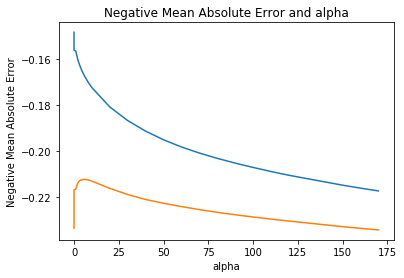

In [416]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
#plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [417]:
from sklearn.linear_model import RidgeCV
alpha=[0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10,20,30,40,50,55,60,65,70,75,80,85,90,
      95,100,105,110,115,120,150,155,160,165,170,175,180,200,300,500]
#alpha = 0.1
rg_cv = RidgeCV(alphas=alpha)
m_cv = rg_cv.fit(X_train, Y_train)
m_cv.alpha_


5.0

In [418]:
ridge = Ridge(alpha=6.0)

ridge.fit(X_train, Y_train)
ridge.coef_

array([-0.06257973,  0.00583676,  0.07401695,  0.15339536,  0.09837428,
        0.00075272, -0.25159224, -0.09394851, -0.29442272,  0.39347234,
       -0.03415641,  0.03165268, -0.02586356,  0.37905789,  0.04444066,
       -0.00791789,  0.01108164, -0.00554228, -0.02206638, -0.04731937,
       -0.00140811,  0.01951839,  0.04424165,  0.05669045,  0.02177751,
        0.00696353,  0.00405698,  0.00724619,  0.0031231 , -0.01070997,
        0.00122842,  0.00837625, -0.11092072, -0.05432296,  0.02215005,
        0.00550719,  0.08060522,  0.07038298,  0.0613632 , -0.01417007,
        0.06149669, -0.03917291,  0.04207082,  0.00065018,  0.08278684,
        0.06188872,  0.08657107,  0.06141267, -0.07365211, -0.04360976,
       -0.00127308,  0.09120787,  0.08228971,  0.0056903 ,  0.04960504,
        0.05164828,  0.09694722, -0.09010958,  0.21838281, -0.19434055,
       -0.06611971, -0.02496423, -0.07785575, -0.18335615, -0.13325653,
        0.02965959, -0.11939472,  0.2010544 ,  0.16180531, -0.05

In [419]:
print(ridge.alpha)
#print(ridge.best_score_)

6.0


Ridge picked 242 features and eliminated the other 3 features


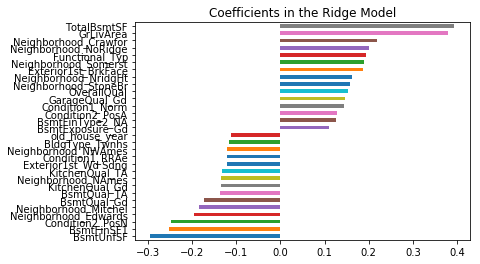

In [420]:
coefs = pd.Series(ridge.coef_, index = X_train.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(15),
                     coefs.sort_values().tail(15)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()

## Lasso


In [453]:
params={'alpha':[0.0001,0.0002,0.0003,.0004,.0005,.0006,.0007,.0008,.0009]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, Y_train) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    3.5s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [454]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.0004}
-0.2138435384008809


In [455]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.124769,0.020296,0.0016,0.001959,0.0001,{'alpha': 0.0001},-0.214561,-0.244701,-0.231995,-0.210971,-0.200954,-0.220630,0.015652,9,-0.153531,-0.150014,-0.149077,-0.154370,-0.155040,-0.152407,0.002403
1,0.107173,0.008540,0.0008,0.001600,0.0002,{'alpha': 0.0002},-0.210618,-0.242577,-0.228466,-0.212128,-0.189570,-0.216666,0.017892,8,-0.156867,-0.152739,-0.152012,-0.157427,-0.159522,-0.155714,0.002875
2,0.078380,0.008234,0.0000,0.000000,0.0003,{'alpha': 0.0003},-0.209000,-0.239866,-0.227404,-0.211425,-0.184695,-0.214473,0.018636,4,-0.159896,-0.155557,-0.154855,-0.159531,-0.163479,-0.158664,0.003150
3,0.072375,0.010152,0.0000,0.000000,0.0004,{'alpha': 0.0004},-0.208752,-0.237909,-0.227823,-0.210888,-0.183870,-0.213844,0.018472,1,-0.162831,-0.157692,-0.157603,-0.161601,-0.166589,-0.161263,0.003379
4,0.077580,0.007417,0.0000,0.000000,0.0005,{'alpha': 0.0005},-0.208246,-0.237310,-0.229591,-0.210344,-0.183962,-0.213885,0.018621,2,-0.165243,-0.159759,-0.159984,-0.163951,-0.169340,-0.163655,0.003566


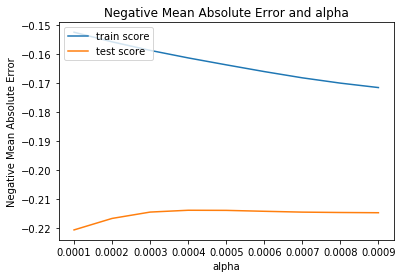

In [456]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [457]:
alpha =0.0004

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, Y_train) 

Lasso(alpha=0.0004, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [458]:
lasso.coef_

array([-5.38582698e-02,  3.20505195e-03,  7.65987025e-02,  1.47812864e-01,
        1.00041227e-01,  3.09658505e-03, -2.73197472e-01, -1.00464060e-01,
       -3.20703115e-01,  4.38369774e-01, -5.46665720e-02,  2.15361253e-02,
       -2.65677538e-02,  3.89139084e-01,  4.20854353e-02, -7.37306944e-03,
        9.84703724e-03, -9.99897950e-03, -2.64759557e-02, -4.78564000e-02,
        0.00000000e+00,  8.85953561e-03,  4.56470821e-02,  5.26825962e-02,
        2.09418215e-02,  1.05371670e-02,  3.52660623e-03,  4.66453421e-03,
        7.98125086e-04, -6.26717210e-03,  1.03909283e-04,  7.49785973e-03,
       -1.27438946e-01, -5.71694510e-02,  3.62215694e-02,  6.36362539e-03,
        4.73987598e-02,  8.03342289e-02,  6.77480674e-02,  0.00000000e+00,
        4.34192866e-02, -5.06318938e-02,  8.43937146e-03, -0.00000000e+00,
        3.55924625e-02,  2.16369819e-02,  5.63155760e-02,  4.87720379e-02,
       -7.60047186e-02, -0.00000000e+00,  0.00000000e+00,  8.17732676e-02,
        1.25750811e-01,  

Ridge picked 161 features and eliminated the other 84 features


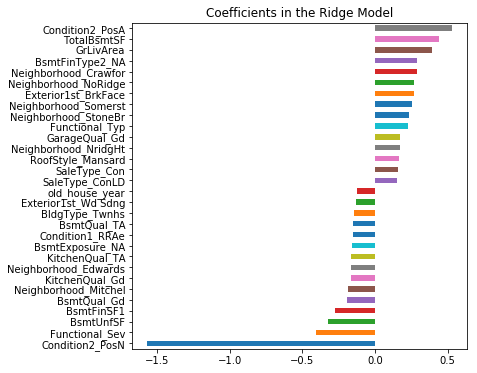

In [500]:
coefs_lasso = pd.Series(lasso.coef_, index = X_train.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs_lasso.sort_values().head(15),
                     coefs_lasso.sort_values().tail(15)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()

In [460]:
from sklearn.linear_model import Ridge, RidgeCV, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, Y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [461]:
model_ridge = Ridge()

In [462]:
alphas = [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]

cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

Text(0,0.5,'rmse')

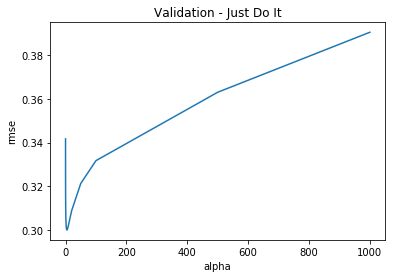

In [463]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [464]:
cv_ridge.min()

0.3000563068558196

In [465]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, Y_train)

In [466]:
rmse_cv(model_lasso).mean()

0.30639535375126475

In [467]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)

In [468]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 149 variables and eliminated the other 96 variables


In [469]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

Text(0.5,1,'Coefficients in the Lasso Model')

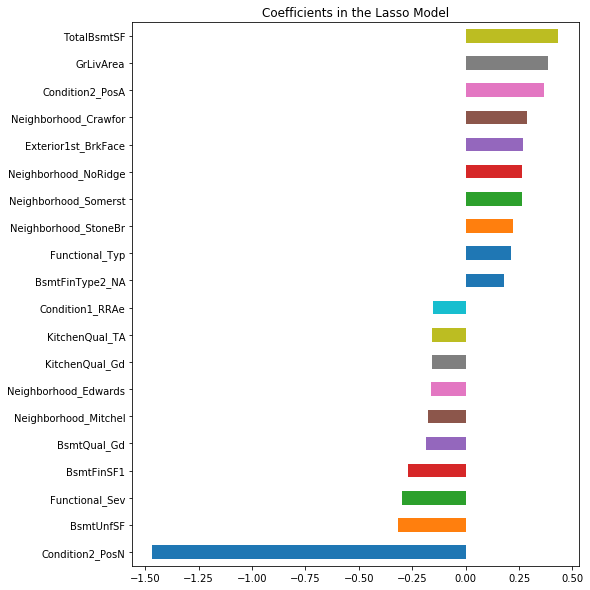

In [470]:
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

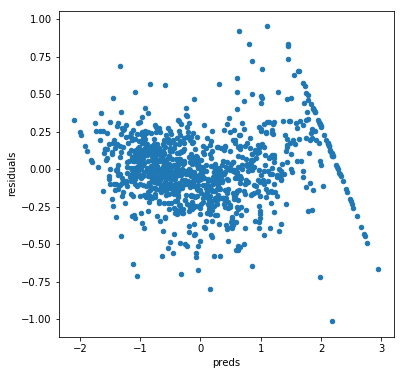

In [471]:
#let's look at the residuals as well:
plt.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model_lasso.predict(X_train), "true":Y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

## Model using Lasso 

In [578]:
coefs_lasso.sort_values().tail(20).index.values

array(['BsmtExposure_Gd', 'SaleCondition_Alloca', 'Condition1_Norm',
       'SaleCondition_AdjLand', 'OverallQual', 'SaleType_ConLD',
       'SaleType_Con', 'RoofStyle_Mansard', 'Neighborhood_NridgHt',
       'GarageQual_Gd', 'Functional_Typ', 'Neighborhood_StoneBr',
       'Neighborhood_Somerst', 'Exterior1st_BrkFace',
       'Neighborhood_NoRidge', 'Neighborhood_Crawfor', 'BsmtFinType2_NA',
       'GrLivArea', 'TotalBsmtSF', 'Condition2_PosA'], dtype=object)

In [579]:
lasso_X = ['BsmtExposure_Gd', 'SaleCondition_Alloca', 'Condition1_Norm',
       'SaleCondition_AdjLand', 'OverallQual', 'SaleType_ConLD',
       'SaleType_Con', 'RoofStyle_Mansard', 'Neighborhood_NridgHt',
       'GarageQual_Gd', 'Functional_Typ', 'Neighborhood_StoneBr',
       'Neighborhood_Somerst', 'Exterior1st_BrkFace',
       'Neighborhood_NoRidge', 'Neighborhood_Crawfor', 'BsmtFinType2_NA',
       'GrLivArea', 'TotalBsmtSF', 'Condition2_PosA']

In [582]:
m_df = X_train[lasso_X]
m_df

,BsmtExposure_Gd,SaleCondition_Alloca,Condition1_Norm,SaleCondition_AdjLand,OverallQual,SaleType_ConLD,SaleType_Con,RoofStyle_Mansard,Neighborhood_NridgHt,GarageQual_Gd,Functional_Typ,Neighborhood_StoneBr,Neighborhood_Somerst,Exterior1st_BrkFace,Neighborhood_NoRidge,Neighborhood_Crawfor,BsmtFinType2_NA,GrLivArea,TotalBsmtSF,Condition2_PosA
210,0,0,1,0,-0.795151,0,0,0,0,0,1,0,0,0,0,0,0,-1.343420,-0.463005,0
318,1,0,1,0,0.651479,0,0,0,0,0,1,0,0,0,1,0,0,2.388724,0.766797,0
239,0,0,1,0,-0.071836,0,0,0,0,0,1,0,0,0,0,0,0,-0.029218,-0.791461,0
986,0,0,0,0,-0.071836,0,0,0,0,0,1,0,0,0,0,0,0,0.282984,-1.428004,0
1416,0,0,1,0,-1.518467,0,0,0,0,0,1,0,0,0,0,0,0,1.664690,-0.684522,0
390,0,0,1,0,-0.795151,0,0,0,0,0,1,0,0,0,0,0,0,-0.282355,-0.470643,0
1005,0,0,1,0,-0.795151,0,0,0,0,0,1,0,0,0,0,0,0,-1.088174,-0.154918,0
568,1,0,1,0,1.374795,0,0,0,0,1,0,0,0,0,0,0,0,1.331393,1.146177,0
342,0,0,1,0,-2.241782,0,0,0,0,0,1,0,0,0,0,0,1,-0.972153,-2.662899,0
114,0,0,1,0,-0.071836,0,0,0,0,0,1,0,0,0,0,1,0,1.727974,-0.045432,0


In [583]:
col = m_df.columns
col

Index(['BsmtExposure_Gd', 'SaleCondition_Alloca', 'Condition1_Norm', 'SaleCondition_AdjLand',
       'OverallQual', 'SaleType_ConLD', 'SaleType_Con', 'RoofStyle_Mansard',
       'Neighborhood_NridgHt', 'GarageQual_Gd', 'Functional_Typ', 'Neighborhood_StoneBr',
       'Neighborhood_Somerst', 'Exterior1st_BrkFace', 'Neighborhood_NoRidge',
       'Neighborhood_Crawfor', 'BsmtFinType2_NA', 'GrLivArea', 'TotalBsmtSF', 'Condition2_PosA'],
      dtype='object')

In [584]:
import statsmodels.api as sm

X_train_lm = sm.add_constant(X_train[col])
lso_1 = sm.OLS(Y_train,X_train_lm).fit()
#lr_1.params
print(lso_1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     259.3
Date:                Mon, 08 Jul 2019   Prob (F-statistic):               0.00
Time:                        22:46:00   Log-Likelihood:                -523.14
No. Observations:                1021   AIC:                             1088.
Df Residuals:                    1000   BIC:                             1192.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.54

In [586]:

#lasso_X = lasso_X.remove('SaleCondition_Alloca')
m_df = m_df.drop('RoofStyle_Mansard',axis=1)
col = m_df.columns

In [587]:
X_train_lm = sm.add_constant(X_train[col])
lso_2 = sm.OLS(Y_train,X_train_lm).fit()
#lr_1.params
print(lso_2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     273.1
Date:                Mon, 08 Jul 2019   Prob (F-statistic):               0.00
Time:                        22:48:32   Log-Likelihood:                -523.32
No. Observations:                1021   AIC:                             1087.
Df Residuals:                    1001   BIC:                             1185.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.53

In [588]:
m_df = m_df.drop('SaleCondition_Alloca',axis=1)
col = m_df.columns

In [589]:
X_train_lm = sm.add_constant(X_train[col])
lso_3 = sm.OLS(Y_train,X_train_lm).fit()
#lr_1.params
print(lso_3.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     288.3
Date:                Mon, 08 Jul 2019   Prob (F-statistic):               0.00
Time:                        22:49:52   Log-Likelihood:                -523.62
No. Observations:                1021   AIC:                             1085.
Df Residuals:                    1002   BIC:                             1179.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.53

In [590]:
m_df = m_df.drop('Condition2_PosA',axis=1)
col = m_df.columns

In [591]:
X_train_lm = sm.add_constant(X_train[col])
lso_4 = sm.OLS(Y_train,X_train_lm).fit()
#lr_1.params
print(lso_4.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     305.4
Date:                Mon, 08 Jul 2019   Prob (F-statistic):               0.00
Time:                        22:50:45   Log-Likelihood:                -523.96
No. Observations:                1021   AIC:                             1084.
Df Residuals:                    1003   BIC:                             1173.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.53

In [592]:
m_df = m_df.drop('SaleCondition_AdjLand',axis=1)
col = m_df.columns

In [593]:
X_train_lm = sm.add_constant(X_train[col])
lso_5 = sm.OLS(Y_train,X_train_lm).fit()
#lr_1.params
print(lso_5.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     324.5
Date:                Mon, 08 Jul 2019   Prob (F-statistic):               0.00
Time:                        22:51:44   Log-Likelihood:                -524.38
No. Observations:                1021   AIC:                             1083.
Df Residuals:                    1004   BIC:                             1167.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.5362 

In [594]:
m_df = m_df.drop('SaleType_ConLD',axis=1)
col = m_df.columns

In [595]:
X_train_lm = sm.add_constant(X_train[col])
lso_6 = sm.OLS(Y_train,X_train_lm).fit()
#lr_1.params
print(lso_6.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     346.1
Date:                Mon, 08 Jul 2019   Prob (F-statistic):               0.00
Time:                        22:52:47   Log-Likelihood:                -524.80
No. Observations:                1021   AIC:                             1082.
Df Residuals:                    1005   BIC:                             1160.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.5376 

In [596]:
m_df = m_df.drop('SaleType_Con',axis=1)
col = m_df.columns

In [597]:
X_train_lm = sm.add_constant(X_train[col])
lso_6 = sm.OLS(Y_train,X_train_lm).fit()
#lr_1.params
print(lso_6.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     370.0
Date:                Mon, 08 Jul 2019   Prob (F-statistic):               0.00
Time:                        22:53:41   Log-Likelihood:                -526.11
No. Observations:                1021   AIC:                             1082.
Df Residuals:                    1006   BIC:                             1156.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.5392 

In [598]:
m_df = m_df.drop('GarageQual_Gd',axis=1)
col = m_df.columns

In [599]:
X_train_lm = sm.add_constant(X_train[col])
lso_7 = sm.OLS(Y_train,X_train_lm).fit()
#lr_1.params
print(lso_7.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     397.4
Date:                Mon, 08 Jul 2019   Prob (F-statistic):               0.00
Time:                        22:54:31   Log-Likelihood:                -527.73
No. Observations:                1021   AIC:                             1083.
Df Residuals:                    1007   BIC:                             1152.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.5323 

In [600]:
m_df = m_df.drop('Neighborhood_StoneBr',axis=1)
col = m_df.columns

In [601]:
X_train_lm = sm.add_constant(X_train[col])
lso_7 = sm.OLS(Y_train,X_train_lm).fit()
#lr_1.params
print(lso_7.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     428.5
Date:                Mon, 08 Jul 2019   Prob (F-statistic):               0.00
Time:                        22:55:03   Log-Likelihood:                -530.15
No. Observations:                1021   AIC:                             1086.
Df Residuals:                    1008   BIC:                             1150.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.5272 

In [602]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [603]:
vif = pd.DataFrame()
vif['Feature'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by= 'VIF', ascending=False)
vif

,Feature,VIF
1,Condition1_Norm,5.20
4,Functional_Typ,5.19
2,OverallQual,2.14
11,TotalBsmtSF,1.87
10,GrLivArea,1.72
3,Neighborhood_NridgHt,1.37
9,BsmtFinType2_NA,1.36
7,Neighborhood_NoRidge,1.25
0,BsmtExposure_Gd,1.23
5,Neighborhood_Somerst,1.20


# Model Evalution

In [604]:
XP = lso_7.predict(X_train_lm)

Text(0.5,0,'Errors')

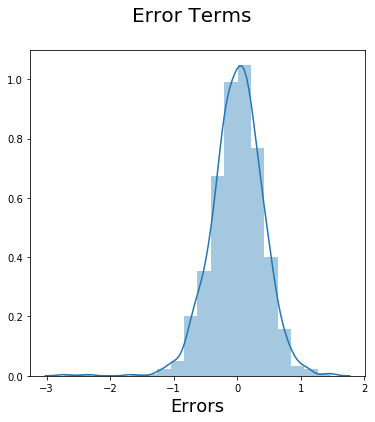

In [605]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((Y_train - XP), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

In [606]:
#### Check R-squre for modle_37
from sklearn.metrics import mean_squared_error,r2_score
mse40 = mean_squared_error(Y_train, XP)
r_squared40 = r2_score(Y_train, XP)

In [607]:
print('MSE:', mse40)
print("R-squre:", r_squared40)

MSE: 0.16540048492607168
R-squre: 0.83609951978831


Text(0,0.5,'y_pred')

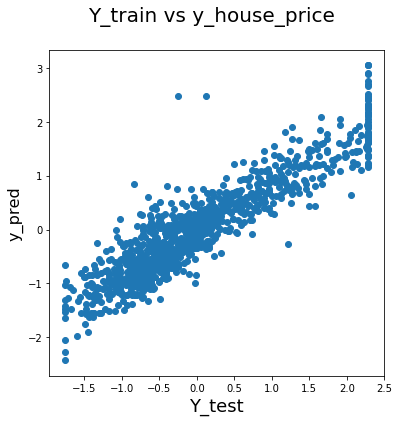

In [609]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(Y_train, XP)
fig.suptitle('Y_train vs y_house_price', fontsize = 20)              # Plot heading 
plt.xlabel('Y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [610]:
col

Index(['BsmtExposure_Gd', 'Condition1_Norm', 'OverallQual', 'Neighborhood_NridgHt',
       'Functional_Typ', 'Neighborhood_Somerst', 'Exterior1st_BrkFace', 'Neighborhood_NoRidge',
       'Neighborhood_Crawfor', 'BsmtFinType2_NA', 'GrLivArea', 'TotalBsmtSF'],
      dtype='object')

## Lets use REF


In [480]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [481]:
df_ref = df_c1.copy()

In [482]:
df_ref1 = scaler.fit_transform(df_ref) 


In [483]:
XR = df_ref.drop('SalePrice',axis=1)
YR = df_ref['SalePrice']

In [484]:
## Spliting Dataset into train and test
XR_train , XR_test , YR_train, YR_test = train_test_split(XR,YR, train_size = 0.7, test_size = 0.3, random_state = 100)

In [485]:
## Feature Selction using RFE

from sklearn.linear_model import LogisticRegression
r1 = LogisticRegression()

In [487]:
from sklearn import preprocessing
from sklearn import utils
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(YR_train)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(YR_train))
print(utils.multiclass.type_of_target(YR_train.astype('float')))
print(utils.multiclass.type_of_target(training_scores_encoded))

[398 188 100 172 327 300  92 253 162  43  81 147 145 200   9  79 372  73
 148 295 130  16 314  60 395  32 188 345 165 128  53  49  86  62 281 238
 279 241 113 181  49  72 123 220 356 285 100 192 277  13 309 136 309 152
 266 247   7  28  40 230  57 209  80 371 305 257 286 123 110 233 128 335
 419  47  78  36 114  89 327 396 118  43 108 148 128 375  66 156 144 148
 101 144 232 161 201 100 384 188  67  20 218  12 265 381 173 148 214 130
 364 127 314 219  23 301 207  86 153 232 144  92 332 120  80  67 161 280
 308 251 384  77 280  27 226 339 420 281 176 344 344 233 251 386  73 346
  58 426  84  41  56 151 267  94 365 123 298 140 232  75 428 392 123  36
 409 225 240  41 298 110 253 107 353 119 244  68 165 384 123  20 128 226
  72  42 232 324 402   0 150 411 178 196 285 173 335  52 324 170 362 142
 374 183  22 178  24 148 208  49 136 367  56 412  29  58  97  37 128 234
 252 188 360 136 250  47 226 327 280   4  57 338 216 202 184 375 288 406
 110 294 187  39 397 361 289 212 110 110 355 227 20

In [488]:
from sklearn.feature_selection import RFE
rfe1 = RFE(r1 , 20)
rfe1 = rfe1.fit(XR_train,training_scores_encoded)
rfe1.support_

array([False,  True, False, False, False, False,  True, False, False,
       False,  True, False, False, False,  True, False,  True, False,
       False,  True,  True,  True, False,  True,  True, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False,

In [492]:
list(zip(XR_train.columns , rfe1.support_ , rfe1.ranking_))

[('LotFrontage', False, 7),
 ('LotArea', True, 1),
 ('Street', False, 187),
 ('OverallQual', False, 12),
 ('OverallCond', False, 19),
 ('MasVnrArea', False, 46),
 ('ExterQual', True, 1),
 ('ExterCond', False, 64),
 ('BsmtFinSF1', False, 97),
 ('BsmtFinSF2', False, 66),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', False, 10),
 ('CentralAir', False, 105),
 ('1stFlrSF', False, 25),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 122),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 14),
 ('BsmtHalfBath', False, 67),
 ('FullBath', True, 1),
 ('HalfBath', True, 1),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', False, 55),
 ('KitchenQual', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Functional', False, 94),
 ('Fireplaces', False, 16),
 ('FireplaceQu', False, 4),
 ('GarageCars', True, 1),
 ('GarageArea', True, 1),
 ('PavedDrive', False, 92),
 ('WoodDeckSF', False, 47),
 ('OpenPorchSF', False, 42),
 ('EnclosedPorch', False, 71),
 ('3SsnPorch', False, 177),
 ('ScreenPorch', False, 81),
 ('PoolArea

In [493]:
col = XR_train.columns[rfe1.support_]
col

Index(['LotArea', 'ExterQual', 'BsmtUnfSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'old_house_year',
       'MSSubClass_dwel_type_20', 'HouseStyle_1Story', 'HouseStyle_2Story', 'Foundation_PConc',
       'BsmtQual_3', 'BsmtFinType1_Unf', 'GarageFinish_Unf'],
      dtype='object')

In [494]:
XR_train.columns[~rfe1.support_]

Index(['LotFrontage', 'Street', 'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterCond',
       'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', 'CentralAir',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial'],
      dtype='object', length=214)

In [496]:
import statsmodels.api as sm

XR_train_lm = sm.add_constant(XR_train[col])
lr_1 = sm.OLS(YR_train,XR_train_lm).fit()
#lr_1.params
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     163.0
Date:                Mon, 08 Jul 2019   Prob (F-statistic):          1.50e-276
Time:                        21:14:18   Log-Likelihood:                -569.54
No. Observations:                 884   AIC:                             1181.
Df Residuals:                     863   BIC:                             1282.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     